In [1]:
import dask.array as da
import napari
import btrack
from tqdm.auto import tqdm
from skimage.io import imshow,  imsave
import matplotlib.pyplot as plt
import numpy as np
import itertools
import json
from skimage.morphology import remove_small_objects
plt.rcParams["figure.figsize"] = (15,7)

# Conclusion from previous parameter search

The segmentation and objects identification is where the quality lies

... what if I could interpolate the intermediate segment shapes?

### Load images from zarr and compress into max projections

In [3]:
gfp = da.from_zarr('/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/tzxy_stack_ch1.zarr/')
rfp = da.from_zarr('/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/tzxy_stack_ch2.zarr/')
gfp = da.sum(gfp, axis = 1, dtype='u2')
rfp = da.sum(rfp, axis = 1, dtype='u2')
masks = da.from_zarr(f'/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/zarr/tzxy_stack_ch99.zarr/',)# chunks = gfp.chunks)

In [4]:
masks

dask.array<from-zarr, shape=(75, 6048, 6048), dtype=uint16, chunksize=(1, 2160, 2160), chunktype=numpy.ndarray>

### Sanity check: can I track a model data set on this new set up

In [15]:
from btrack import datasets

In [16]:
segmentation = datasets.example_segmentation()

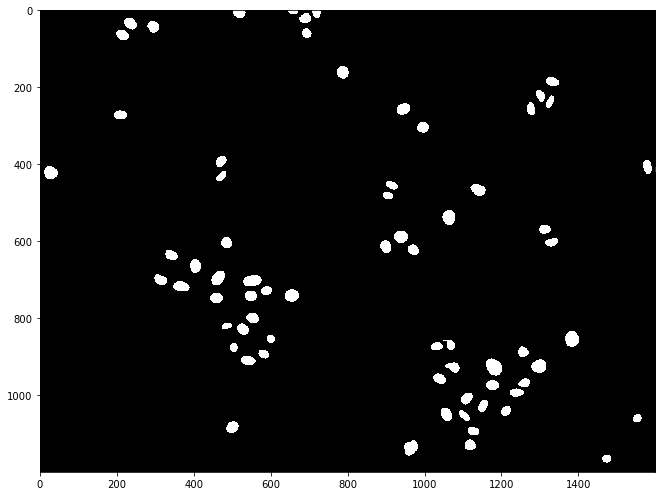

In [17]:
imshow(segmentation[0])

In [6]:
segmentation.shape

(500, 1200, 1600)

In [15]:
viewer = napari.Viewer()
viewer.add_labels(segmentation)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Labels layer 'segmentation' at 0x7f89a7e00fd0>

mode is cell:  True


[INFO][2022/08/09 11:12:16 am] Loaded btrack: /home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/btrack/libs/libtracker.so
[INFO][2022/08/09 11:12:16 am] btrack (v0.4.5) library imported
[INFO][2022/08/09 11:12:16 am] Starting BayesianTracker session
[INFO][2022/08/09 11:12:16 am] Localizing objects from segmentation...
[INFO][2022/08/09 11:14:18 am] Objects are of type: <class 'dict'>
[INFO][2022/08/09 11:14:19 am] ...Found 34804 objects in 75 frames.
[INFO][2022/08/09 11:14:19 am] Objects are of type: <class 'list'>
[INFO][2022/08/09 11:14:19 am] Starting tracking... 
[INFO][2022/08/09 11:14:19 am] Tracking objects in frames 0 to 75 (of 75)...
[INFO][2022/08/09 11:14:43 am]  - Timing (Bayesian updates: 11.59ms, Linking: 0.94ms)
[INFO][2022/08/09 11:14:43 am]  - Probabilities (Link: 0.91317, Lost: 1.00000)
[INFO][2022/08/09 11:14:43 am] SUCCESS.
[INFO][2022/08/09 11:14:43 am]  - Found 18214 tracks in 75 frames (in 0.0s)
[INFO][2022/08/09 11:14:44 am]  - Inserted 13486 dummy o

GLPK Integer Optimizer 5.0
72856 rows, 142179 columns, 247930 non-zeros
142179 integer variables, all of which are binary
Preprocessing...
36428 rows, 142179 columns, 247930 non-zeros
142179 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 36428
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
36428 rows, 142179 columns, 247930 non-zeros
*     0: obj =   2.168253622e+05 inf =   0.000e+00 (102564)
Perturbing LP to avoid stalling [1834]...
*  2761: obj =   1.854853841e+05 inf =   0.000e+00 (98074)
*  5146: obj =   1.627410096e+05 inf =   0.000e+00 (92555)
*  7266: obj =   1.465954918e+05 inf =   0.000e+00 (86270)
*  9221: obj =   1.340954025e+05 inf =   0.000e+00 (79557)
* 11045: obj =   1.240237794e+05 inf =   0.000e+00 (73267) 1
* 12746: obj =   1.167159216e+05 inf =   0.000e+00 (67406) 1
* 14397: obj =   1.099687322e+

[INFO][2022/08/09 11:15:54 am] Ending BayesianTracker session
[INFO][2022/08/09 11:17:58 am] Loaded btrack: /home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/btrack/libs/libtracker.so
[INFO][2022/08/09 11:17:58 am] btrack (v0.4.5) library imported
[INFO][2022/08/09 11:17:58 am] Starting BayesianTracker session
[INFO][2022/08/09 11:17:58 am] Localizing objects from segmentation...
[INFO][2022/08/09 11:20:01 am] Objects are of type: <class 'dict'>
[INFO][2022/08/09 11:20:01 am] ...Found 34804 objects in 75 frames.
[INFO][2022/08/09 11:20:01 am] Objects are of type: <class 'list'>
[INFO][2022/08/09 11:20:01 am] Starting tracking... 
[INFO][2022/08/09 11:20:01 am] Tracking objects in frames 0 to 75 (of 75)...
[INFO][2022/08/09 11:20:26 am]  - Timing (Bayesian updates: 11.88ms, Linking: 0.88ms)
[INFO][2022/08/09 11:20:26 am]  - Probabilities (Link: 0.91317, Lost: 1.00000)
[INFO][2022/08/09 11:20:26 am] SUCCESS.
[INFO][2022/08/09 11:20:26 am]  - Found 18211 tracks in 75 frames (in 

GLPK Integer Optimizer 5.0
72844 rows, 142121 columns, 247820 non-zeros
142121 integer variables, all of which are binary
Preprocessing...
36422 rows, 142121 columns, 247820 non-zeros
142121 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 36422
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
36422 rows, 142121 columns, 247820 non-zeros
*     0: obj =   2.167851345e+05 inf =   0.000e+00 (102511)
Perturbing LP to avoid stalling [1830]...
*  2025: obj =   1.932557864e+05 inf =   0.000e+00 (99404)
*  4351: obj =   1.701337036e+05 inf =   0.000e+00 (94506)
*  6515: obj =   1.519024800e+05 inf =   0.000e+00 (88650)
*  8457: obj =   1.388950443e+05 inf =   0.000e+00 (82145)
* 10284: obj =   1.281060980e+05 inf =   0.000e+00 (75931) 1
* 11977: obj =   1.199196224e+05 inf =   0.000e+00 (70026) 1
* 13606: obj =   1.130433590e+

[INFO][2022/08/09 11:21:39 am] Ending BayesianTracker session
[INFO][2022/08/09 11:22:43 am] Loaded btrack: /home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/btrack/libs/libtracker.so
[INFO][2022/08/09 11:22:43 am] btrack (v0.4.5) library imported
[INFO][2022/08/09 11:22:43 am] Starting BayesianTracker session
[INFO][2022/08/09 11:22:43 am] Localizing objects from segmentation...
[INFO][2022/08/09 11:24:46 am] Objects are of type: <class 'dict'>
[INFO][2022/08/09 11:24:46 am] ...Found 34804 objects in 75 frames.
[INFO][2022/08/09 11:24:46 am] Objects are of type: <class 'list'>
[INFO][2022/08/09 11:24:46 am] Starting tracking... 
[INFO][2022/08/09 11:24:46 am] Tracking objects in frames 0 to 75 (of 75)...
[INFO][2022/08/09 11:25:11 am]  - Timing (Bayesian updates: 11.88ms, Linking: 0.98ms)
[INFO][2022/08/09 11:25:11 am]  - Probabilities (Link: 0.91317, Lost: 1.00000)
[INFO][2022/08/09 11:25:11 am] SUCCESS.
[INFO][2022/08/09 11:25:11 am]  - Found 18211 tracks in 75 frames (in 

GLPK Integer Optimizer 5.0
72844 rows, 142121 columns, 247820 non-zeros
142121 integer variables, all of which are binary
Preprocessing...
36422 rows, 142121 columns, 247820 non-zeros
142121 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 36422
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
36422 rows, 142121 columns, 247820 non-zeros
*     0: obj =   2.167851345e+05 inf =   0.000e+00 (102688)
Perturbing LP to avoid stalling [1828]...
*  2026: obj =   1.930830761e+05 inf =   0.000e+00 (99579)
*  4377: obj =   1.692309368e+05 inf =   0.000e+00 (94651)
*  6496: obj =   1.510484285e+05 inf =   0.000e+00 (88857)
*  8445: obj =   1.375318046e+05 inf =   0.000e+00 (82344)
* 10246: obj =   1.264950603e+05 inf =   0.000e+00 (76210) 1
* 11942: obj =   1.178963514e+05 inf =   0.000e+00 (70307) 1
* 13574: obj =   1.106770952e+

[INFO][2022/08/09 11:26:24 am] Ending BayesianTracker session


### Tracking does work on example data set, now testing resizing dataset so that its smaller

####  Remove small objects 

In [7]:
masks_post_process = []
for mask in tqdm(masks):
    mask = remove_small_objects(mask.compute(), min_size = 2000)
    masks_post_process.append(mask)
masks_pp = da.stack(masks_post_process, axis = 0)

  0%|          | 0/75 [00:00<?, ?it/s]

#### Resize example segmentation for a quick test 

In [8]:
import cv2

In [9]:
segmentation.shape

(500, 1200, 1600)

In [10]:
seg_post_process = []
for seg in tqdm(segmentation):
    seg = cv2.resize(seg, dsize = (1600*5, 1200*5), interpolation = cv2.INTER_NEAREST_EXACT)
    seg_post_process.append(seg)
segmentation = da.stack(seg_post_process, axis = 0)

  0%|          | 0/500 [00:00<?, ?it/s]

In [11]:
segmentation

dask.array<stack, shape=(500, 6000, 8000), dtype=uint8, chunksize=(1, 6000, 8000), chunktype=numpy.ndarray>

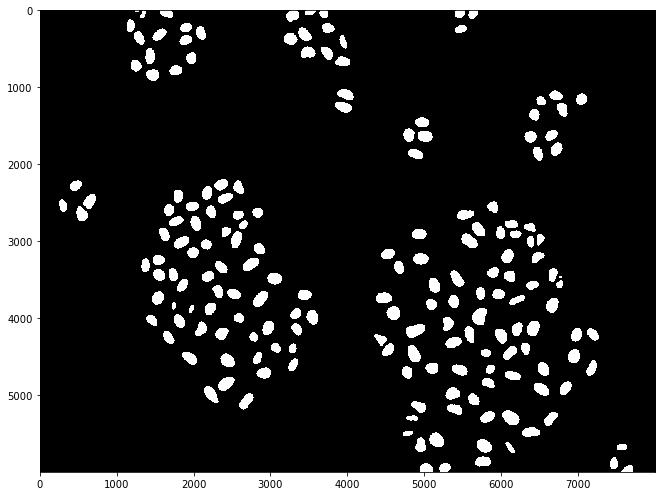

In [12]:
imshow(seg)

In [13]:
viewer = napari.Viewer()
viewer.add_labels(segmentation)


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Labels layer 'segmentation' at 0x7f0c2c64c610>

[INFO][2022/08/09 03:34:34 pm] Loading configuration file: /home/dayn/.cache/btrack-examples/examples/cell_config.json
[INFO][2022/08/09 03:34:42 pm] Loaded btrack: /home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/btrack/libs/libtracker.so
[INFO][2022/08/09 03:34:42 pm] btrack (v0.4.5) library imported
[INFO][2022/08/09 03:34:42 pm] Starting BayesianTracker session
[INFO][2022/08/09 03:34:42 pm] Localizing objects from segmentation...
[INFO][2022/08/09 03:43:51 pm] Objects are of type: <class 'dict'>
[INFO][2022/08/09 03:43:52 pm] ...Found 52890 objects in 500 frames.
[INFO][2022/08/09 03:43:52 pm] Objects are of type: <class 'list'>
[INFO][2022/08/09 03:43:52 pm] Starting tracking... 
[INFO][2022/08/09 03:43:52 pm] Tracking objects in frames 0 to 99 (of 500)...
[INFO][2022/08/09 03:43:52 pm]  - Timing (Bayesian updates: 1.51ms, Linking: 0.33ms)
[INFO][2022/08/09 03:43:52 pm]  - Probabilities (Link: 1.00000, Lost: 0.54881)
[INFO][2022/08/09 03:43:52 pm]  - Stats (Active: 138

GLPK Integer Optimizer 5.0
37612 rows, 35822 columns, 53066 non-zeros
35822 integer variables, all of which are binary
Preprocessing...
18806 rows, 35822 columns, 53066 non-zeros
35822 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 18806
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
18806 rows, 35822 columns, 53066 non-zeros
*     0: obj =   1.219130642e+05 inf =   0.000e+00 (13399)
Perturbing LP to avoid stalling [1921]...
*  5990: obj =   6.184582924e+04 inf =   0.000e+00 (7147)
* 11300: obj =   4.094979977e+04 inf =   0.000e+00 (2561) 3
Removing LP perturbation [14369]...
* 14369: obj =   3.514821623e+04 inf =   0.000e+00 (0) 5
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+ 14369: mip =     not found yet >=              -inf        (1; 0)
+ 14386: >>>>>   3.517050

[INFO][2022/08/09 03:44:17 pm] Completed optimization with 3943 tracks
[INFO][2022/08/09 03:44:17 pm] Ending BayesianTracker session


## Conclusion from that:

Tracking works fine on larger segmentation, so it is something about my data, not the implementation over a larger size, that is the issue here. 

#### What is the mean square displacement per frame for cells?

In [17]:
segmentation

dask.array<stack, shape=(500, 6000, 8000), dtype=uint8, chunksize=(1, 6000, 8000), chunktype=numpy.ndarray>

In [12]:
# load your segmentation data
# create btrack objects (with properties) from the segmentation data
# (you can also calculate properties, based on scikit-image regionprops)
objects = btrack.utils.segmentation_to_objects(
  segmentation, properties=('area', 'centroid', 'centroid_local')
)

# initialise a tracker session using a context manager
with btrack.BayesianTracker() as tracker:

  # configure the tracker using a config file
  tracker.configure('/home/dayn/analysis/BayesianTracker/models/particle_config.json')

  # append the objects to be tracked
  tracker.append(objects)

  # set the volume (Z axis volume limits default to [-1e5, 1e5] for 2D data)
  tracker.volume = ((0, 1200), (0, 1600))

  # track them (in interactive mode)
  tracker.track_interactive(step_size=100)

  # generate hypotheses and run the global optimizer
  tracker.optimize()

  # get the tracks as a python list
  tracks = tracker.tracks

  # optional: get the data in a format for napari
  data, properties, graph = tracker.to_napari()

[INFO][2022/08/09 04:35:49 pm] Localizing objects from segmentation...
[INFO][2022/08/09 04:36:08 pm] Objects are of type: <class 'dict'>
[INFO][2022/08/09 04:36:09 pm] ...Found 52890 objects in 500 frames.
[INFO][2022/08/09 04:36:09 pm] Loaded btrack: /home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/btrack/libs/libtracker.so
[INFO][2022/08/09 04:36:09 pm] btrack (v0.4.5) library imported
[INFO][2022/08/09 04:36:09 pm] Starting BayesianTracker session
[INFO][2022/08/09 04:36:09 pm] Loading configuration file: /home/dayn/analysis/BayesianTracker/models/particle_config.json
[INFO][2022/08/09 04:36:09 pm] Objects are of type: <class 'list'>
[INFO][2022/08/09 04:36:09 pm] Starting tracking... 
[INFO][2022/08/09 04:36:09 pm] Tracking objects in frames 0 to 99 (of 500)...
[INFO][2022/08/09 04:36:09 pm]  - Timing (Bayesian updates: 0.75ms, Linking: 0.17ms)
[INFO][2022/08/09 04:36:09 pm]  - Probabilities (Link: 1.00000, Lost: 1.00000)
[INFO][2022/08/09 04:36:09 pm]  - Stats (Active:

GLPK Integer Optimizer 5.0
43880 rows, 65999 columns, 110058 non-zeros
65999 integer variables, all of which are binary
Preprocessing...
21940 rows, 65999 columns, 110058 non-zeros
65999 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 21940
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
21940 rows, 65999 columns, 110058 non-zeros
*     0: obj =  -8.661713941e+05 inf =   0.000e+00 (196)
*   197: obj =  -8.674194841e+05 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+   197: mip =     not found yet >=              -inf        (1; 0)
+   197: >>>>>  -8.674194841e+05 >=  -8.674194841e+05   0.0% (1; 0)
+   197: mip =  -8.674194841e+05 >=     tree is empty   0.0% (0; 1)
INTEGER OPTIMAL SOLUTION FOUND


[INFO][2022/08/09 04:36:15 pm] Ending BayesianTracker session


In [17]:
viewer = napari.Viewer()
viewer.add_tracks(data)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Tracks layer 'data' at 0x7fcf5c505250>

In [28]:
def euc_dist(x1, y1, x2, y2):
    if x2 == None:
        return None
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

In [70]:
msd_pf_ = []
for track in tqdm(tracks):
    if len(track) > 20:
        d = []
        coords_t1 = None, None
        for coords in zip(track.x, track.y):
            x1, y1 = coords
            x2, y2 = coords_t1
            d.append(euc_dist(x1, y1, x2, y2))
            coords_t1 = coords
        msd_pf = np.mean(d[1:])
        msd_pf_.append(msd_pf)
print('Average MSD per frame for example dataset is:',np.mean(msd_pf_))

  0%|          | 0/10873 [00:00<?, ?it/s]

Average MSD per frame for example dataset is: 2.2333777483425976


Average MSD per frame for example dataset is: 2.2333777483425976


# MSD pf for actual data

Take notes on location with a points layer

In [71]:
masks

dask.array<from-zarr, shape=(75, 6048, 6048), dtype=uint16, chunksize=(1, 2160, 2160), chunktype=numpy.ndarray>

In [5]:
import napari
import numpy as np

In [21]:
points = []

In [23]:
gfp

dask.array<sum-aggregate, shape=(75, 6048, 6048), dtype=uint16, chunksize=(1, 2160, 2160), chunktype=numpy.ndarray>

In [25]:
viewer = napari.Viewer()

points = viewer.add_points()
viewer.add_labels(masks)
viewer.add_image(gfp, blending = 'additive', colormap = 'green')

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'gfp' at 0x7f4b24a45580>

### This points data is my visual assessment of where the centroid lies, not exactly very accurate.

In [26]:
points.data

array([[2883.65196822, 2262.94590514],
       [2872.74372278, 2287.18645055],
       [2882.43994095, 2305.36685961],
       [2835.17087739, 2289.61050509],
       [2821.83857741, 2281.1263142 ],
       [2798.81005927, 2252.0376597 ],
       [2801.23411381, 2264.15793241],
       [2798.81005927, 2283.55036874],
       [2809.71830471, 2310.21496869],
       [2803.65816835, 2220.52495067],
       [2790.32586838, 2187.80021436],
       [2796.38600473, 2193.86035071],
       [2790.32586838, 2233.85725064],
       [2791.53789565, 2216.88886885],
       [2796.38600473, 2219.31292339]])

In [31]:
msd_pf_2 = []
d_2 = []
coords_t1 = None, None
for coords in points.data:
    x1, y1 = coords
    x2, y2 = coords_t1
    d_2.append(euc_dist(x1, y1, x2, y2))
    coords_t1 = coords
msd_pf2 = np.mean(d_2[1:])
msd_pf_2.append(msd_pf2)
print('Average MSD per frame for example dataset is:',np.mean(msd_pf_2))

Average MSD per frame for example dataset is: 29.093975527769402


### Using the points data to pull the label value from an individual segment and then using that to find the centroid and MSD

In [32]:
viewer = napari.Viewer()

points_1 = viewer.add_points()
points_2 = viewer.add_points()
points_3 = viewer.add_points()

viewer.add_labels(masks)
viewer.add_image(gfp, blending = 'additive', colormap = 'green')

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'gfp' at 0x7f4b0da99670>

In [39]:
for points_i in [points_1, points_2, points_3]:
    points = points_i.data
    msd_pf_list = []
    coords_t1 = None, None
    d_i = []
    for coords in points:
        x1, y1 = coords
        x2, y2 = coords_t1
        d_i.append(euc_dist(x1, y1, x2, y2))
        coords_t1 = coords
    msd_pf = np.mean(d_i[1:])
    msd_pf_list.append(msd_pf)
    print('Average MSD per frame for example dataset is:',np.mean(msd_pf))

Average MSD per frame for example dataset is: 7.992505680028197
Average MSD per frame for example dataset is: 66.59435440537037
Average MSD per frame for example dataset is: 30.894417725330047


# Now calculate actual centroid from segmentation map

In [ ]:
for points_i in [points_1, points_2, points_3]:
    points = points_i.data
    msd_pf_list = []
    coords_t1 = None, None
    d_i = []
    for coords in points:
        find_centroid_coords
        
        
        x1, y1 = coords
        x2, y2 = coords_t1
        d_i.append(euc_dist(x1, y1, x2, y2))
        coords_t1 = coords
    msd_pf = np.mean(d_i[1:])
    msd_pf_list.append(msd_pf)
    print('Average MSD per frame for example dataset is:',np.mean(msd_pf))

In [ ]:
def find_centroid_coords(x1, y1)
    

In [53]:
points_1.ndim

2

In [44]:
for coords in points_1.data:
    

array([[5106.14276438, 3926.09810005],
       [5121.8991189 , 3937.00634549],
       [5194.62075514, 3932.15823641],
       [5227.34549145, 3921.24999097],
       [5266.13036411, 3912.76580008],
       [5249.16198232, 3927.31012732],
       [5257.64617322, 3932.15823641],
       [5270.97847319, 3926.09810005],
       [5270.97847319, 3926.09810005],
       [5270.97847319, 3926.09810005],
       [5270.97847319, 3926.09810005],
       [5270.97847319, 3926.09810005],
       [5270.97847319, 3926.09810005],
       [5270.97847319, 3926.09810005],
       [5270.97847319, 3926.09810005],
       [5270.97847319, 3926.09810005],
       [5270.97847319, 3926.09810005],
       [5270.97847319, 3926.09810005],
       [5295.21901861, 3944.27850911],
       [5312.1874004 , 3956.39878182],
       [5321.88361856, 3956.39878182],
       [5332.791864  , 3961.2468909 ],
       [5332.791864  , 3961.2468909 ],
       [5332.791864  , 3961.2468909 ],
       [5336.42794581, 3962.45891817],
       [5334.00389127, 39

In [ ]:
viewer = napari.Viewer()

points_5 = viewer.add_points(ndim=3)
points_4 = viewer.add_points(ndim=3)
points_3 = viewer.add_points(ndim=3)
points_2 = viewer.add_points(ndim=3)
points_1 = viewer.add_points(ndim=3)

viewer.add_labels(masks)
viewer.add_image(gfp, blending = 'additive', colormap = 'green')

#### Changing data to pandas format

In [58]:
import pandas as pd

In [ ]:
points_5

In [65]:
for n, points in enumerate([points_1, points_2, points_3, points_4, points_5]):
    print(n, points.data)

0 [[0.00000000e+00 1.56780930e+03 2.73646022e+03]
 [1.00000000e+00 1.56239114e+03 2.75406922e+03]
 [2.00000000e+00 1.57187291e+03 2.74729653e+03]
 [3.00000000e+00 1.57729107e+03 2.76558280e+03]
 [4.00000000e+00 1.43032361e+03 2.92609565e+03]
 [5.00000000e+00 1.39781468e+03 2.94370466e+03]
 [6.00000000e+00 1.38494656e+03 2.96470001e+03]
 [7.00000000e+00 1.37343298e+03 3.00533617e+03]
 [8.00000000e+00 1.43709630e+03 2.90916392e+03]
 [9.00000000e+00 1.44725535e+03 2.92203203e+03]
 [1.00000000e+01 1.47570066e+03 2.89561853e+03]
 [1.10000000e+01 1.47908701e+03 2.86717321e+03]
 [1.20000000e+01 1.47434612e+03 2.88884583e+03]
 [1.30000000e+01 1.43912811e+03 2.95183189e+03]
 [1.40000000e+01 1.41271461e+03 2.95860458e+03]
 [1.50000000e+01 1.41745549e+03 2.95250916e+03]
 [1.60000000e+01 1.43641903e+03 2.92135477e+03]
 [1.70000000e+01 1.51972317e+03 2.84482332e+03]
 [1.80000000e+01 1.50753232e+03 2.88342768e+03]
 [1.90000000e+01 1.46554162e+03 2.90103668e+03]
 [2.00000000e+01 1.48653697e+03 2.8976

In [76]:
df_list = []
for n, points in enumerate([points_1, points_2, points_3, points_4, points_5]):
    df = pd.DataFrame(points.data, columns = [f't_{n}', f'x_{n}', f'y_{n}'])
    df.sort_values(by = f't_{n}', axis=0, ignore_index=True, inplace=True)
    df_list.append(df)
    if n ==1:
        break
pd.concat(df_list)

t_0          x_0          y_0   t_1         x_1          y_1
0   0.0  1567.809298  2736.460219   NaN         NaN          NaN
1   1.0  1562.391143  2754.069224   NaN         NaN          NaN
2   2.0  1571.872915  2747.296530   NaN         NaN          NaN
3   3.0  1577.291070  2765.582803   NaN         NaN          NaN
4   4.0  1430.323610  2926.095651   NaN         NaN          NaN
..  ...          ...          ...   ...         ...          ...
67  NaN          NaN          NaN  70.0  782.268397  3496.036819
68  NaN          NaN          NaN  71.0  773.004959  3513.534425
69  NaN          NaN          NaN  72.0  746.243914  3496.036819
70  NaN          NaN          NaN  73.0  764.770791  3506.329528
71  NaN          NaN          NaN  74.0  763.741520  3504.270986

[121 rows x 6 columns]

In [78]:
df

t_1         x_1          y_1
0    0.0  658.755885  3527.944218
1    0.0  644.346092  3550.588178
2    1.0  669.048595  3563.968700
3    2.0  669.048595  3566.027242
4    3.0  694.780368  3574.261410
..   ...         ...          ...
67  70.0  782.268397  3496.036819
68  71.0  773.004959  3513.534425
69  72.0  746.243914  3496.036819
70  73.0  764.770791  3506.329528
71  74.0  763.741520  3504.270986

[72 rows x 3 columns]

In [74]:
df.sort_values(by = f't_{n}', axis=0, ignore_index=True, inplace=True)

t_1         x_1          y_1
0    0.0  658.755885  3527.944218
1    0.0  644.346092  3550.588178
2    1.0  669.048595  3563.968700
3    2.0  669.048595  3566.027242
4    3.0  694.780368  3574.261410
..   ...         ...          ...
67  70.0  782.268397  3496.036819
68  71.0  773.004959  3513.534425
69  72.0  746.243914  3496.036819
70  73.0  764.770791  3506.329528
71  74.0  763.741520  3504.270986

[72 rows x 3 columns]

In [85]:
df.set_index(f't_{n}', verify_integrity=True)

ValueError: Index has duplicate keys: Float64Index([0.0, 17.0], dtype='float64', name='t_1')

In [87]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     t_1         x_1          y_1
0    0.0  658.755885  3527.944218
1    0.0  644.346092  3550.588178
2    1.0  669.048595  3563.968700
3    2.0  669.048595  3566.027242
4    3.0  694.780368  3574.261410
5    4.0  644.346092  3607.198079
6    5.0  631.994841  3619.549331
7    6.0  599.058171  3634.988394
8    7.0  609.350881  3622.637143
9    8.0  638.170467  3625.724956
10   9.0  668.019324  3594.846828
11  10.0  634.053383  3619.549331
12  11.0  607.292339  3620.578601
13  12.0  671.107137  3614.402976
14  13.0  639.199738  3624.695685
15  14.0  691.692555  3587.641932
16  15.0  678.312033  3596.905370
17  17.0  646.404634  3637.046936
18  17.0  656.697344  3623.666414
19  18.0  636.111925  3639.105478
20  19.0  616.555777  3666.895793
21  20.0  610.380152  3655.573813
22  21.0  631.994841  3647.339646
23  22.0  650.521718  3639.105478
24  23.0  630.965570  3653.515271
25  24.0  630.965570  3656.603084
26  25.0  652.580260  3634.988394
27  26.0  655.668073  3618.520060
28  27.0  685.

In [93]:
points_dict = {1:points_1.data, 2: points_2.data, 3: points_3.data, 4:points_4.data, 5:points_5.data}

saving out points dict to work at from home

In [91]:
import pickle

In [94]:
with open('points.pickle', 'wb') as handle:
    pickle.dump(points_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [95]:

with open('points.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [96]:
b

{1: array([[0.00000000e+00, 1.56780930e+03, 2.73646022e+03],
        [1.00000000e+00, 1.56239114e+03, 2.75406922e+03],
        [2.00000000e+00, 1.57187291e+03, 2.74729653e+03],
        [3.00000000e+00, 1.57729107e+03, 2.76558280e+03],
        [4.00000000e+00, 1.43032361e+03, 2.92609565e+03],
        [5.00000000e+00, 1.39781468e+03, 2.94370466e+03],
        [6.00000000e+00, 1.38494656e+03, 2.96470001e+03],
        [7.00000000e+00, 1.37343298e+03, 3.00533617e+03],
        [8.00000000e+00, 1.43709630e+03, 2.90916392e+03],
        [9.00000000e+00, 1.44725535e+03, 2.92203203e+03],
        [1.00000000e+01, 1.47570066e+03, 2.89561853e+03],
        [1.10000000e+01, 1.47908701e+03, 2.86717321e+03],
        [1.20000000e+01, 1.47434612e+03, 2.88884583e+03],
        [1.30000000e+01, 1.43912811e+03, 2.95183189e+03],
        [1.40000000e+01, 1.41271461e+03, 2.95860458e+03],
        [1.50000000e+01, 1.41745549e+03, 2.95250916e+03],
        [1.60000000e+01, 1.43641903e+03, 2.92135477e+03],
        [1.

### Just checking it does indeed work on instance segmentation

In [7]:
from skimage.morphology import label

In [10]:
%%time 
instance_segmentation =[]
for frame in tqdm(segmentation):
    instance_segmentation.append(label(frame))
instance_segmentation = da.stack(instance_segmentation, axis = 0)

  0%|          | 0/500 [00:00<?, ?it/s]

CPU times: user 12.5 s, sys: 804 ms, total: 13.3 s
Wall time: 13.2 s


In [11]:
viewer = napari.Viewer()
viewer.add_labels(instance_segmentation)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Labels layer 'instance_segmentation' at 0x7fd03c45c4f0>

[INFO][2022/08/09 04:34:32 pm] Loading configuration file: /home/dayn/.cache/btrack-examples/examples/cell_config.json
[INFO][2022/08/09 04:34:36 pm] Loaded btrack: /home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/btrack/libs/libtracker.so
[INFO][2022/08/09 04:34:36 pm] btrack (v0.4.5) library imported
[INFO][2022/08/09 04:34:36 pm] Starting BayesianTracker session
[INFO][2022/08/09 04:34:36 pm] Localizing objects from segmentation...
[INFO][2022/08/09 04:34:59 pm] Objects are of type: <class 'dict'>
[INFO][2022/08/09 04:34:59 pm] ...Found 52890 objects in 500 frames.
[INFO][2022/08/09 04:34:59 pm] Objects are of type: <class 'list'>
[INFO][2022/08/09 04:35:00 pm] Starting tracking... 
[INFO][2022/08/09 04:35:00 pm] Tracking objects in frames 0 to 99 (of 500)...
[INFO][2022/08/09 04:35:00 pm]  - Timing (Bayesian updates: 1.27ms, Linking: 0.26ms)
[INFO][2022/08/09 04:35:00 pm]  - Probabilities (Link: 1.00000, Lost: 1.00000)
[INFO][2022/08/09 04:35:00 pm]  - Stats (Active: 78,

GLPK Integer Optimizer 5.0
1632 rows, 1486 columns, 2223 non-zeros
1486 integer variables, all of which are binary
Preprocessing...
816 rows, 1486 columns, 2223 non-zeros
1486 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 816
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
816 rows, 1486 columns, 2223 non-zeros
*     0: obj =   3.099981988e+03 inf =   0.000e+00 (307)
*   243: obj =   9.824504253e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+   243: mip =     not found yet >=              -inf        (1; 0)
+   243: >>>>>   9.824504253e+02 >=   9.824504253e+02   0.0% (1; 0)
+   243: mip =   9.824504253e+02 >=     tree is empty   0.0% (0; 1)
INTEGER OPTIMAL SOLUTION FOUND


[INFO][2022/08/09 04:35:02 pm] Ending BayesianTracker session


#### Also test simulated reduced frame rate test set

In [ ]:
masks = masks